In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ast import literal_eval
from scipy.stats import median_abs_deviation

In [2]:
# lendo os dados
tv = pd.read_csv('../../datasets/processed/tv_stratified.csv')

# mudando o formato das colunas
for col in ('tokens', 'aspect_tags'):
    tv[col] = tv[col].apply(literal_eval)

In [3]:
# comprimento das reviews
tv['lengths'] = tv.tokens.map(len)

[]

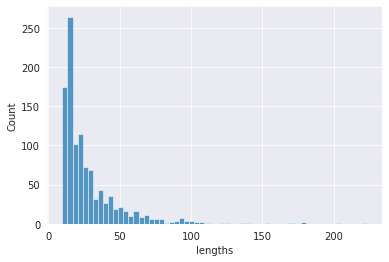

In [4]:
# distribuicão dos comprimentos das reviews
sns.histplot(tv['lengths'])
plt.plot()

In [5]:
# estatísticas do dataset
tv.describe()

,total_aspects,has_aspect,fold,review,lengths
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000
mean,2.132906,0.906508,5.491292,546.000000,28.601283
std,1.402399,0.291254,2.872308,315.088876,22.898010
min,0.000000,0.000000,1.000000,1.000000,10.000000
25%,1.000000,1.000000,3.000000,273.500000,15.000000
50%,2.000000,1.000000,5.000000,546.000000,21.000000
75%,3.000000,1.000000,8.000000,818.500000,33.500000
max,10.000000,1.000000,10.000000,1091.000000,223.000000


In [6]:
# quantidade de reviews maior do que 100 e maior do que 200 tokens
tv[tv.lengths > 100].shape[0], tv[tv.lengths > 200].shape[0]

(18, 2)

- São 1.091 reviews no conjunto todo.
- Em média, as reviews possuem 2 aspectos. Sendo 10 o maior número de aspecto em uma única review.
- 90.65% das reviews possuem ao menos um aspecto.
- Em média, as reviews possuem aproximadamente 29 tokens.
- 75% das reviews possuem até 33 tokens.
- A review que possui o maior comprimento, possui 223 tokens.
- 18 reviews possui mais do que 100 tokens e 2 reviews possui mais do que 200.

In [7]:
# total de reviews por particão e total de aspectos por particão
summary = tv.groupby(['fold']).agg({'review': 'nunique', 'total_aspects': 'sum'}).reset_index()
summary

,fold,review,total_aspects
0,1,110,233
1,2,109,233
2,3,109,230
3,4,109,231
4,5,110,233
5,6,109,232
6,7,109,233
7,8,109,235
8,9,109,232
9,10,108,235


In [8]:
# mediana e o desvio absoluto da mediana
summary.total_aspects.median(), median_abs_deviation(summary.total_aspects)

(233.0, 1.0)